In [7]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl

In [8]:
dataset=pd.read_csv("./Admission_Predict_Ver1.1.csv")
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
#Omitting the first column
updated_dataset=dataset.iloc[:,1:9]
updated_dataset.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
print(updated_dataset.shape)
updated_dataset.describe()

NameError: name 'updated_dataset' is not defined

In [5]:
#Checking for NA values
updated_dataset.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
updated_dataset.corr(method="pearson")

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<AxesSubplot:xlabel='Research', ylabel='Chance of Admit '>

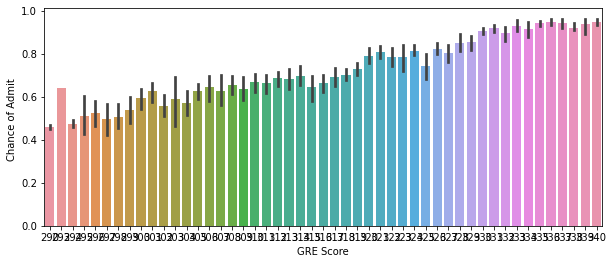

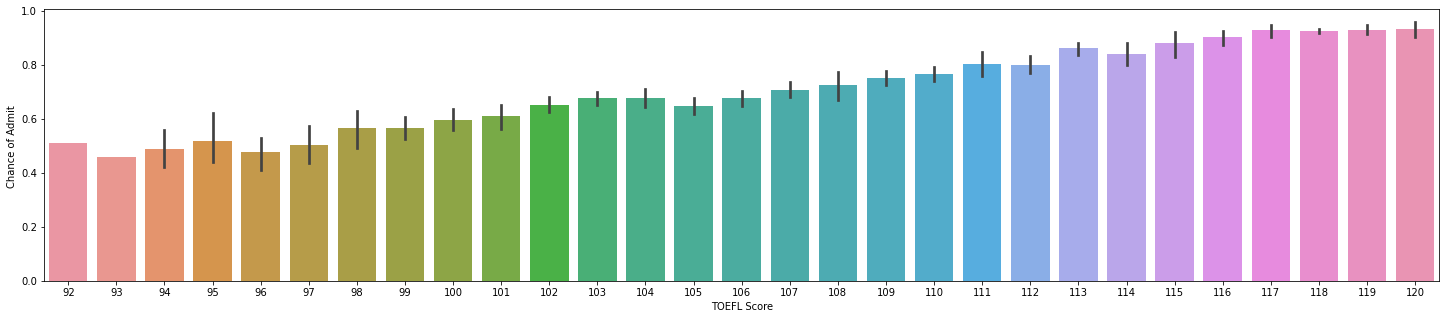

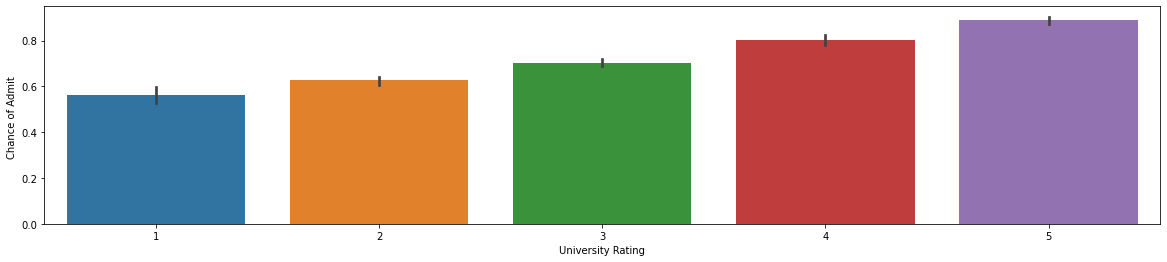

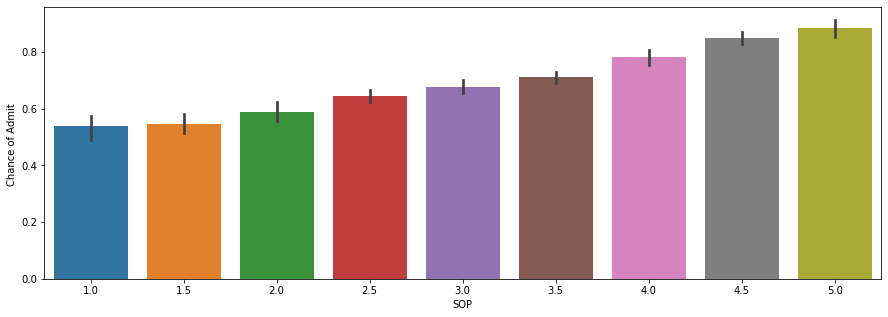

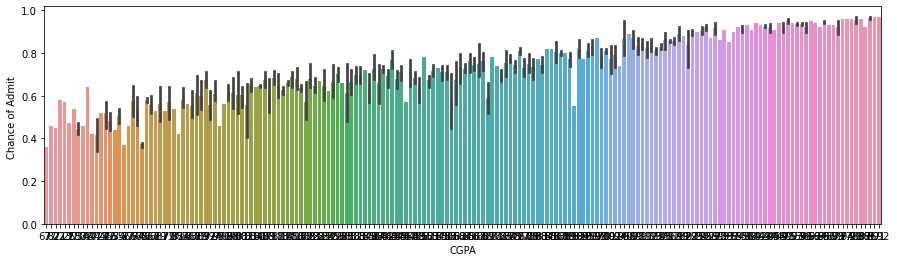

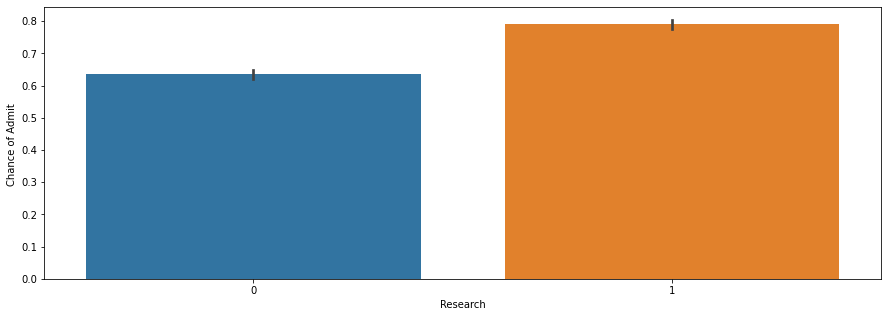

In [5]:
plt.subplots(figsize=(10,4))
sns.barplot(x="GRE Score",y="Chance of Admit ",data=dataset)

plt.subplots(figsize=(15,4))
sns.barplot(x="CGPA",y="Chance of Admit ",data=dataset)
plt.subplots(figsize=(15,5))
sns.barplot(x="Research",y="Chance of Admit ",data=dataset)

<AxesSubplot:xlabel='TOEFL Score', ylabel='Chance of Admit '>

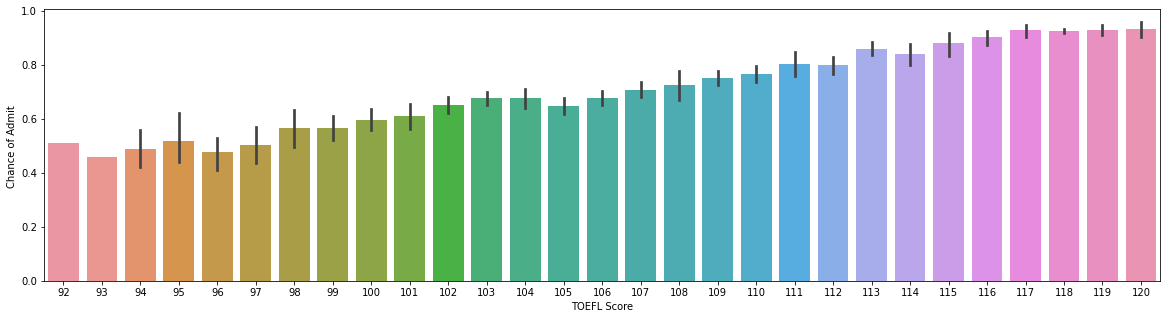

In [7]:
plt.subplots(figsize=(20,5))
sns.barplot(x="TOEFL Score",y="Chance of Admit ",data=dataset)

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit '>

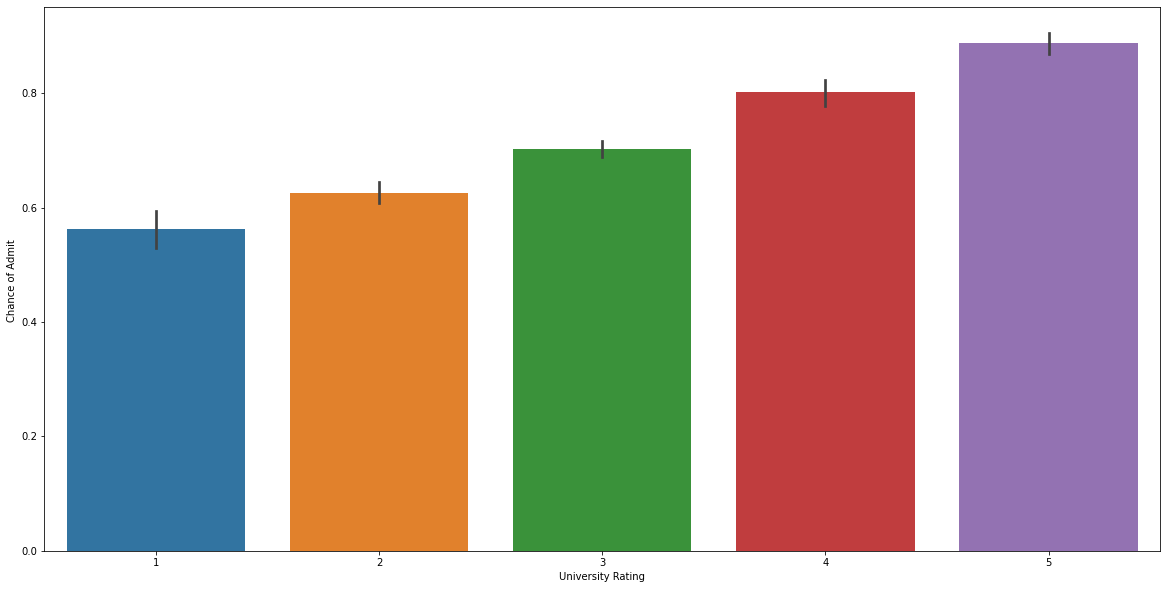

In [9]:
plt.subplots(figsize=(20,10))
sns.barplot(x="University Rating",y="Chance of Admit ",data=dataset)

<AxesSubplot:xlabel='SOP', ylabel='Chance of Admit '>

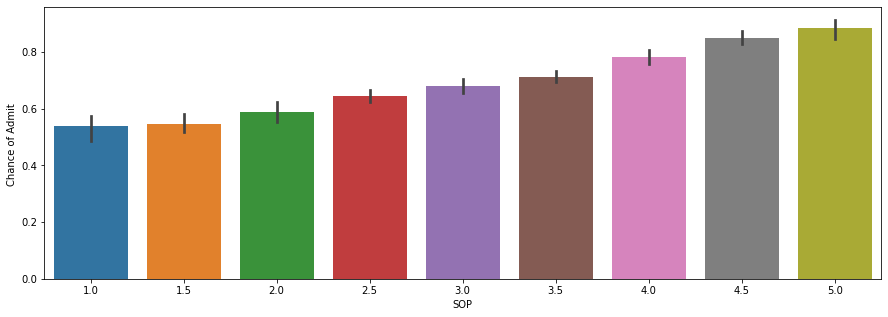

In [10]:
plt.subplots(figsize=(15,5))
sns.barplot(x="SOP",y="Chance of Admit ",data=dataset)

In [5]:
y=updated_dataset["Chance of Admit"]
y=[1 if i>0.8 else 0 for i in y]

NameError: name 'updated_dataset' is not defined

In [30]:
X=updated_dataset.iloc[:,:7]
y=updated_dataset["Chance of Admit "]

In [9]:
print(X.shape)
print(y.shape)
X.head()

(500, 7)
(500,)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)

In [17]:
from sklearn.linear_model import LinearRegression #Linear Regression
Linear=LinearRegression()
Linear.fit(X_train,y_train)
y_pred=Linear.predict(X_test)
y_pred

array([0.62858489, 0.5630453 , 0.62610849, 0.52278247, 0.50451666,
       0.76156908, 0.90718643, 0.6458427 , 0.5415052 , 0.55657926,
       0.96425939, 0.93686676, 0.78819729, 0.74752677, 0.77994022,
       0.65097779, 0.77492475, 0.89655977, 0.66998219, 0.7928963 ,
       0.67387898, 0.65227253, 0.68469348, 0.60918057, 0.65299459,
       0.7319318 , 0.7324281 , 0.84755228, 0.68454267, 0.61497989,
       0.99610597, 0.68451526, 0.86773922, 0.8851996 , 0.55217387,
       0.72482522, 0.9660184 , 0.73846807, 0.96128332, 0.47471084,
       0.95160397, 0.83413252, 0.69629798, 0.72724642, 0.80494755,
       0.66388272, 0.74984219, 0.8369197 , 0.52067787, 0.83186697,
       0.83943883, 0.81875093, 0.58809134, 0.66652365, 0.56024635,
       0.79175916, 0.75478871, 0.97239619, 0.43578097, 0.58490642,
       0.62547018, 0.96412368, 0.82489705, 0.88263358, 0.63923411,
       0.64090726, 0.7174835 , 0.71048489, 0.56912616, 0.93739847,
       0.9005515 , 0.72556868, 0.88482532, 0.7595775 , 0.66992

In [12]:
from sklearn.metrics import mean_absolute_error,r2_score
print("R2 score of the model is ",r2_score(y_pred,y_test))
print("mean_absolute_error  of the model is ",mean_absolute_error(y_pred,y_test))

R2 score of the model is  0.8206313959741904
mean_absolute_error  of the model is  0.04040078799417793


<AxesSubplot:xlabel='CGPA', ylabel='University Rating'>

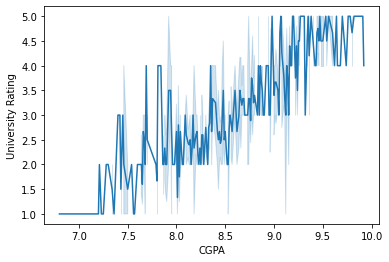

In [22]:
#Line plot
sns.lineplot(x="CGPA",y="University Rating",data=updated_dataset)

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit '>

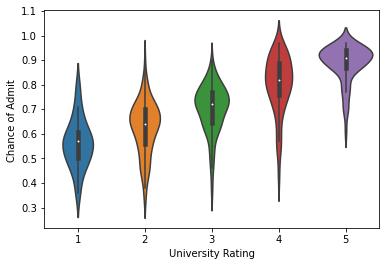

In [33]:
#Violin plot
sns.violinplot(x="University Rating",y="Chance of Admit ",data=updated_dataset)

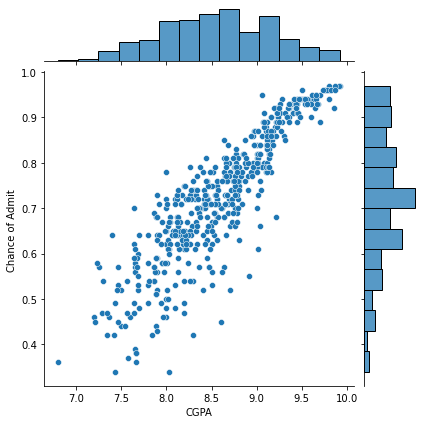

In [31]:
#Join plot
sns.jointplot(x="CGPA",y="Chance of Admit ",data=updated_dataset)

<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit '>

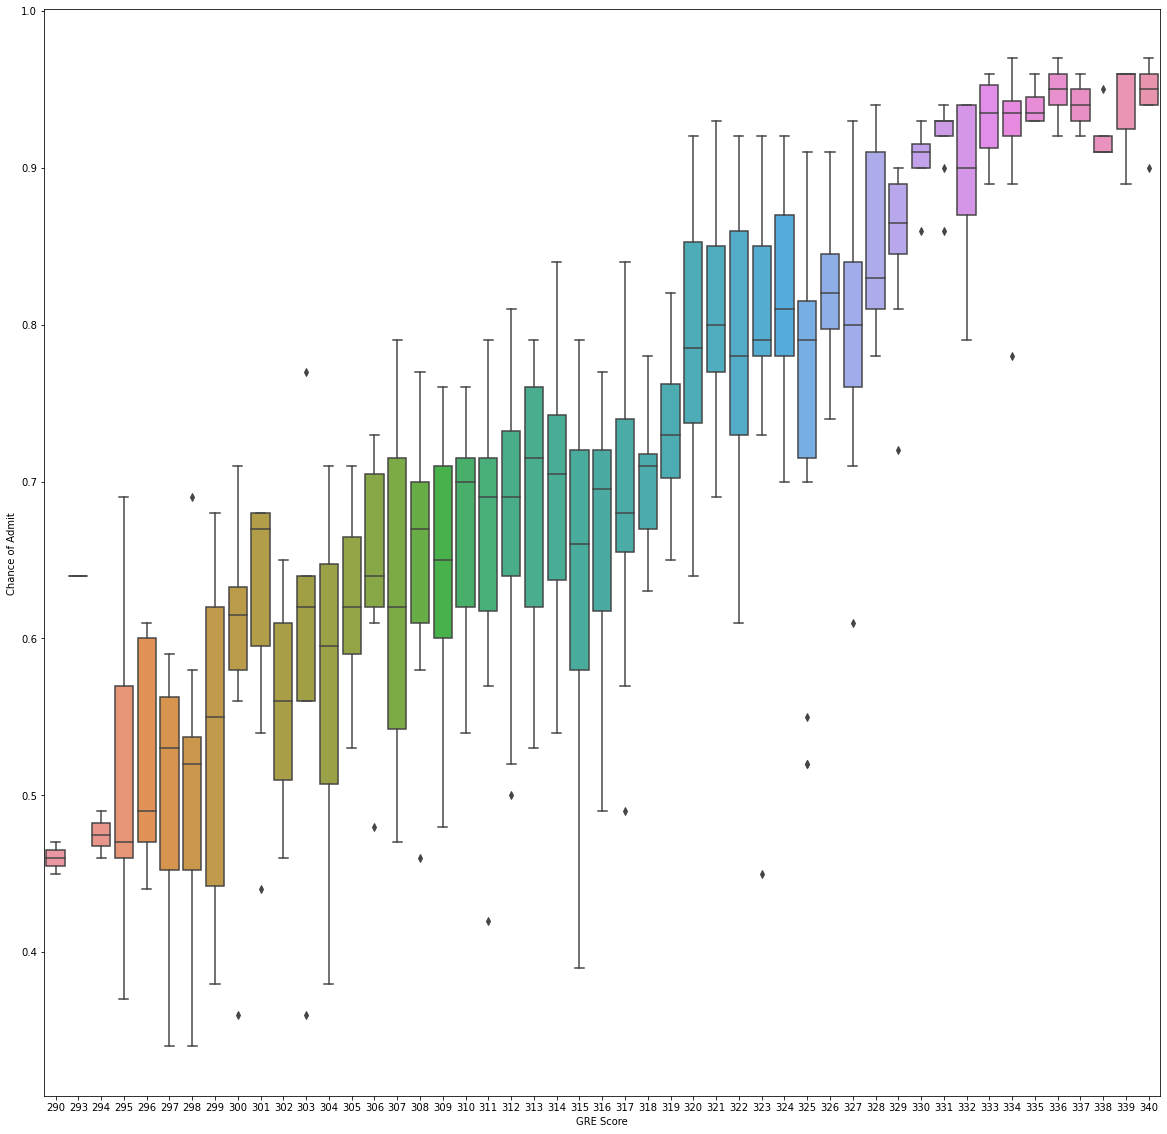

In [35]:
#Box plot
plt.figure(figsize=(20,20))
sns.boxplot(x="GRE Score",y="Chance of Admit ",data=updated_dataset)

<AxesSubplot:xlabel='TOEFL Score', ylabel='Chance of Admit '>

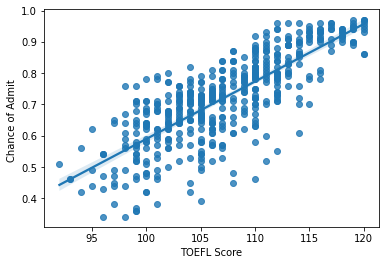

In [37]:
#Regression plot
sns.regplot(x="TOEFL Score",y="Chance of Admit ",data=updated_dataset)

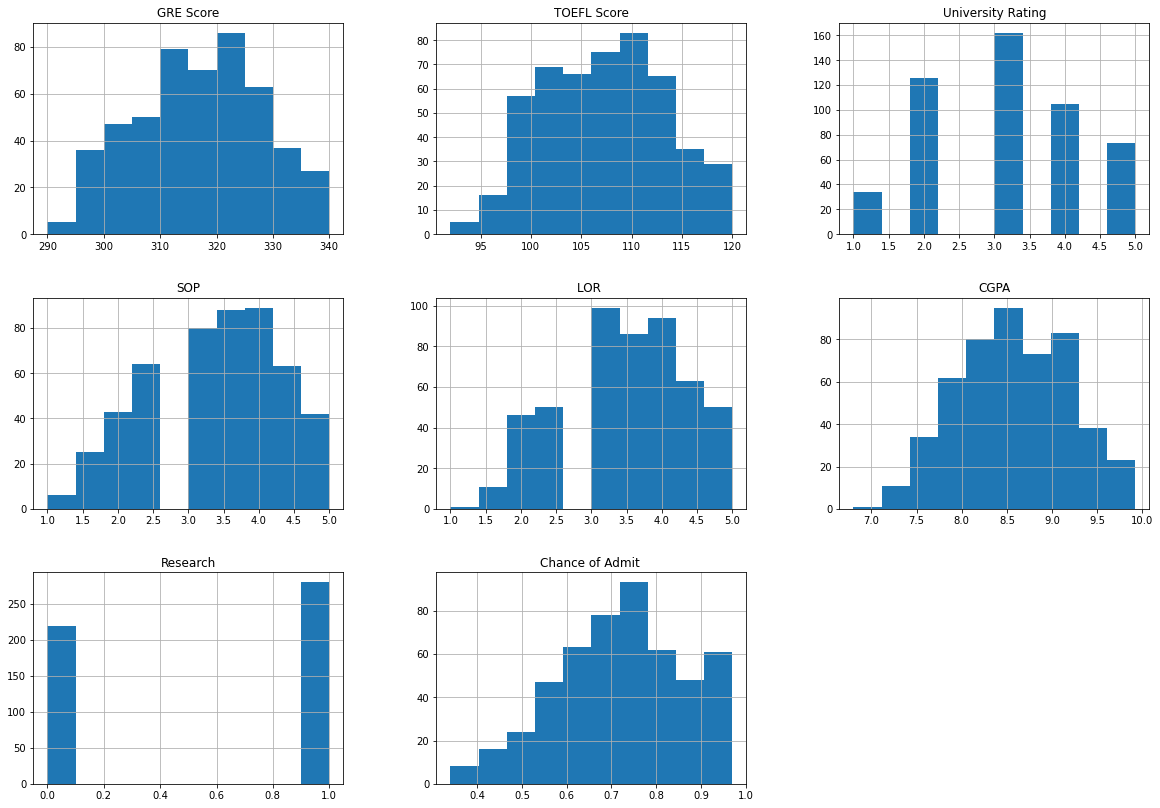

In [39]:
#Histogram for each column
updated_dataset.hist(figsize=(20,14))
plt.show()

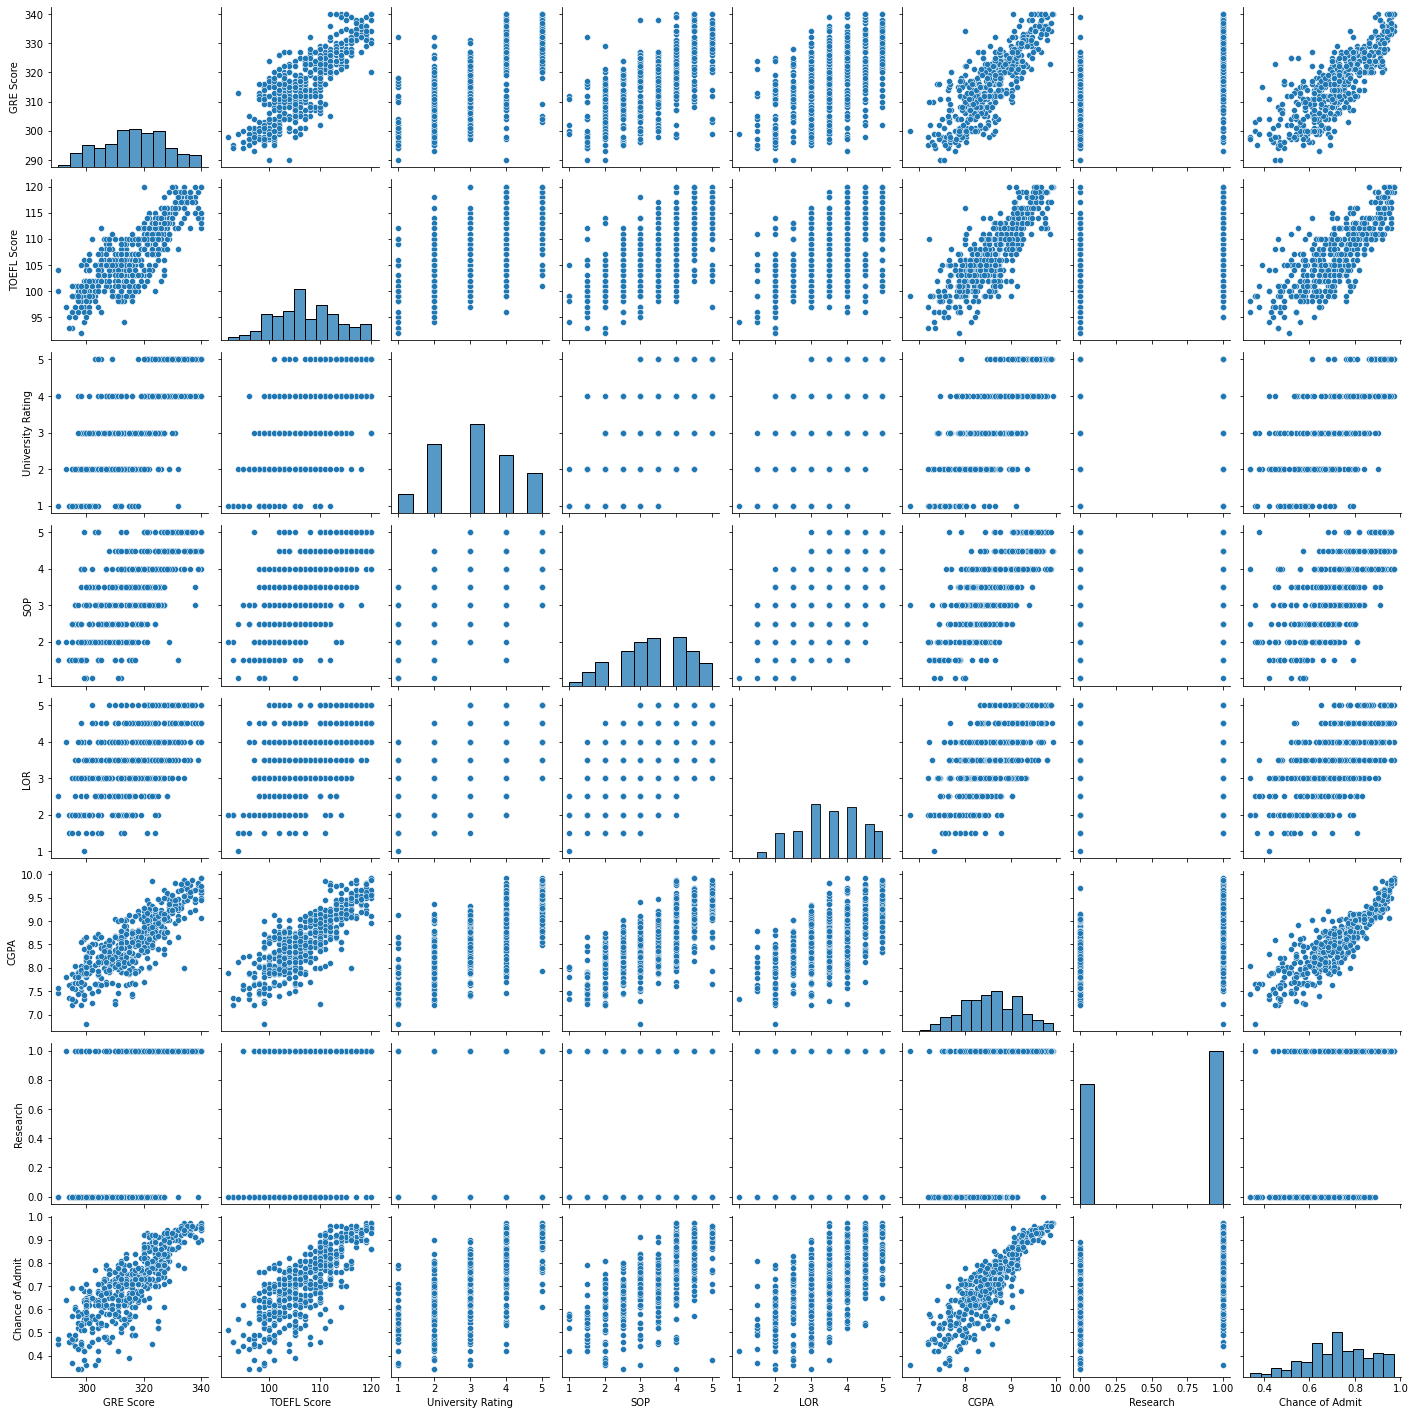

In [40]:
#Pair plot
sns.pairplot(data=updated_dataset)

<AxesSubplot:>

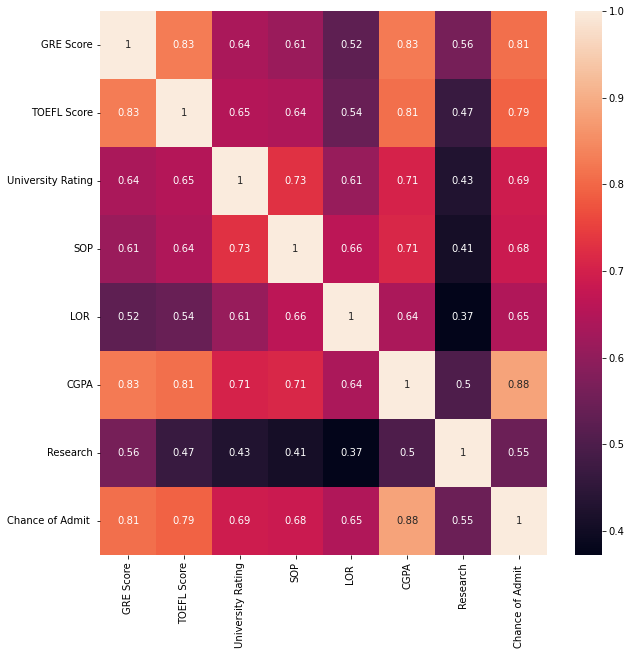

In [41]:
#Heat map
plt.figure(figsize=(10,10))
sns.heatmap(updated_dataset.corr(),annot=True)

In [ ]:
x=
plt.step(x,y)